In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

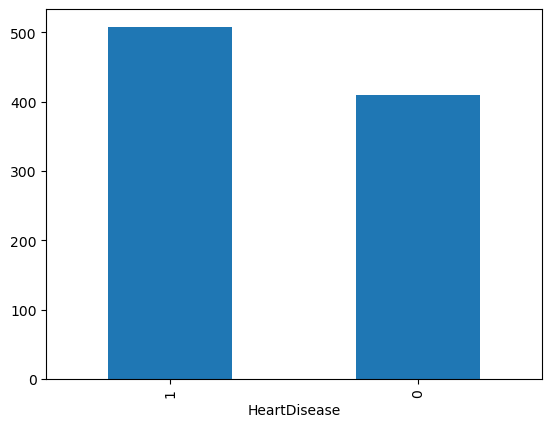

In [9]:
df['HeartDisease'].value_counts().plot(kind="bar")

In [10]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

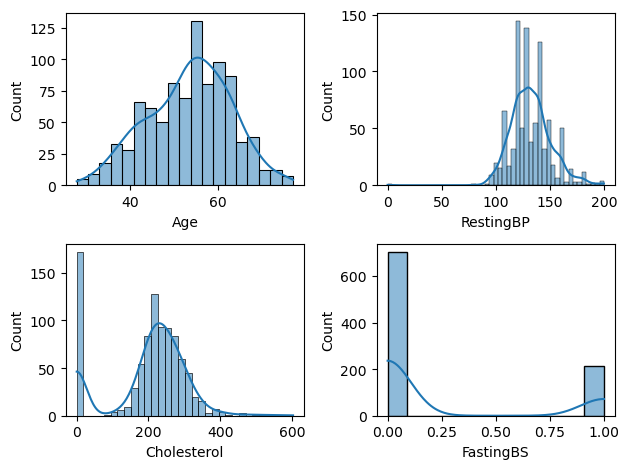

In [11]:
def plotting(var, num): 
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('FastingBS', 4)

plt.tight_layout()

In [12]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [13]:
ch_mean = df[df['Cholesterol'] != 0]['Cholesterol'].mean()

In [14]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [15]:
ch_mean

244.6353887399464

In [16]:
resbp_mean = df[df['RestingBP'] != 0]['RestingBP'].mean()

In [17]:
df['RestingBP'] = df['RestingBP'].replace(0, resbp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

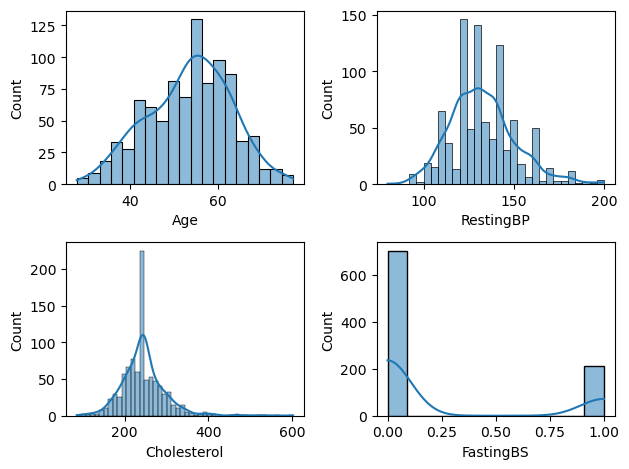

In [18]:
def plotting(var, num): 
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('FastingBS', 4)

plt.tight_layout()

In [19]:
pip install sheryanalysis==0.1.0

  Obtaining dependency information for sheryanalysis==0.1.0 from https://files.pythonhosted.org/packages/b7/d9/20ebcbc474315735b08fb830ded29fb8b3284cef4c4c244b375ce7d35433/sheryanalysis-0.1.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [20]:
import sheryanalysis as sh  
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

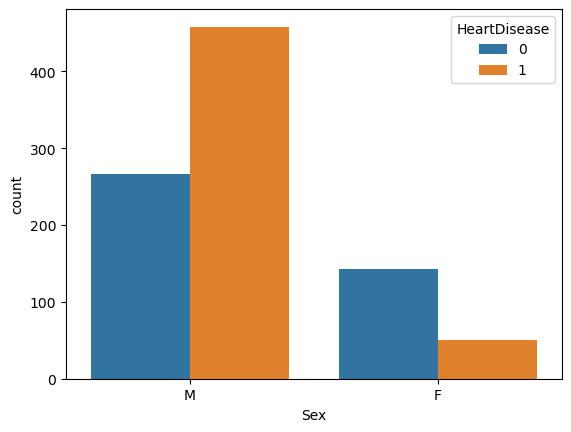

In [21]:
sns.countplot(x=df['Sex'], hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

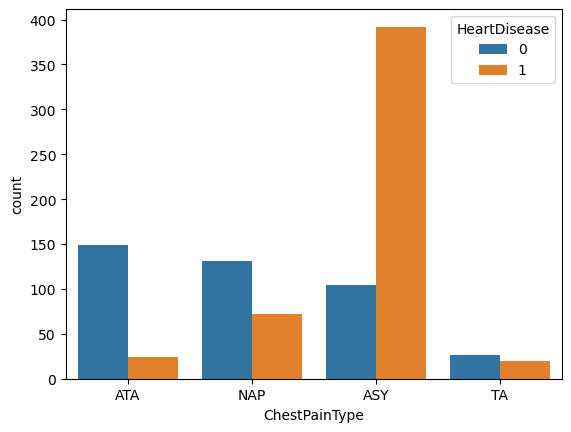

In [22]:
sns.countplot(x=df['ChestPainType'], hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

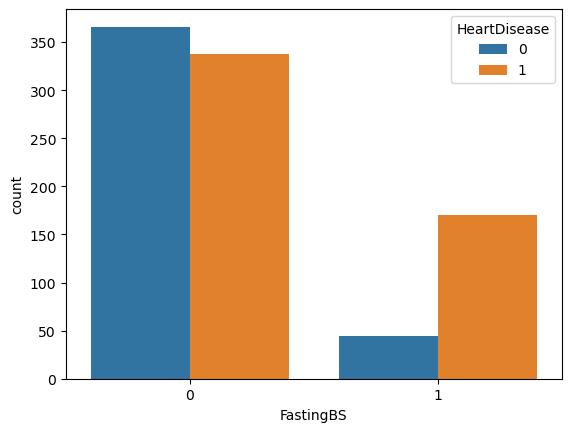

In [23]:
sns.countplot(x=df['FastingBS'], hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

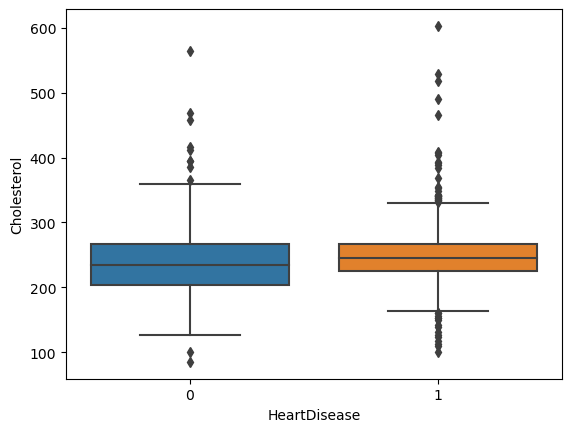

In [24]:
sns.boxplot(y=df['Cholesterol'], x=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

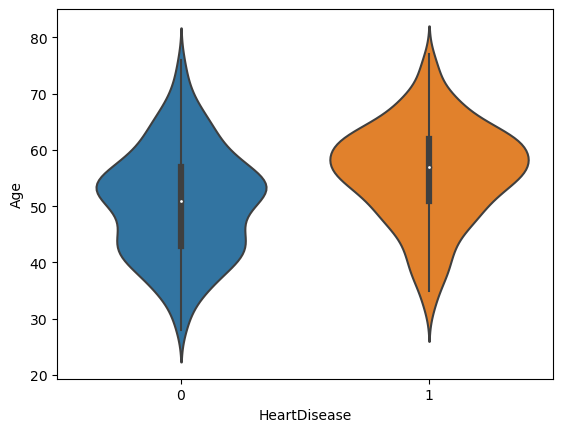

In [25]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: >

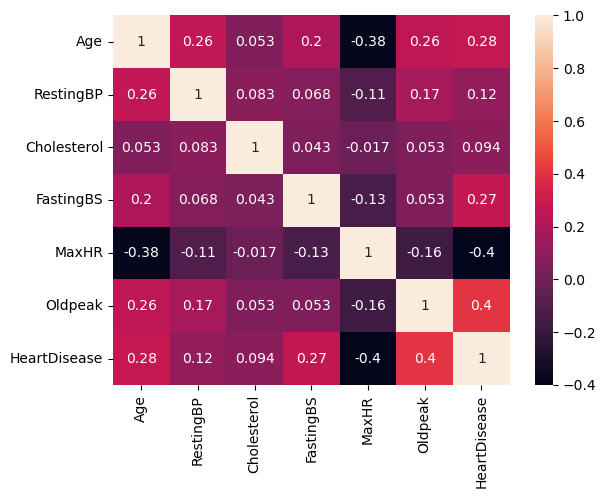

In [26]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Preprocessing and Cleaning

In [27]:
df_encode = pd.get_dummies(df, drop_first=True)

In [28]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [29]:
df_encode = df_encode.astype(int)

In [30]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [31]:
from scipy.stats import pearsonr

selected_features = [
    'Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
    'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'
]

correlations = {
    feature: pearsonr(df_encode[feature], df_encode['HeartDisease'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
13,ST_Slope_Flat,0.554134
12,ExerciseAngina_Y,0.494282
5,Oldpeak,0.392385
6,Sex_M,0.305445
0,Age,0.282039
3,FastingBS,0.267291
1,RestingBP,0.117909
11,RestingECG_ST,0.102527
2,Cholesterol,0.092586
9,ChestPainType_TA,-0.054790


In [32]:
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,0,1,0,0,0,1


In [33]:
cat_features = [
    'FastingBS', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
    'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 
    'ST_Slope_Flat', 'ST_Slope_Up'
]

In [34]:
from scipy.stats import chi2_contingency
alpha = 0.05
chi2_result = {}

for cat in cat_features: 
    contingency = pd.crosstab(df_encode[cat], df_encode['HeartDisease'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency)
    descision = "Reject Null (Keep Feature)" if p_value < alpha else "Accept Null (Drop Feature)"
    chi2_result[cat] = {'chi2_statistics': chi2_stat, 'P_val': p_value, 'Descision': descision}

df_chi2 = pd.DataFrame(chi2_result).T 
df_chi2 = df_chi2.sort_values(by='P_val')
df_chi2

,chi2_statistics,P_val,Descision
ST_Slope_Up,352.823905,0.0,Reject Null (Keep Feature)
ST_Slope_Flat,279.659914,0.0,Reject Null (Keep Feature)
ExerciseAngina_Y,222.259383,0.0,Reject Null (Keep Feature)
ChestPainType_ATA,146.236323,0.0,Reject Null (Keep Feature)
Sex_M,84.145101,0.0,Reject Null (Keep Feature)
FastingBS,64.320679,0.0,Reject Null (Keep Feature)
ChestPainType_NAP,40.608711,0.0,Reject Null (Keep Feature)
RestingECG_ST,9.135266,0.002507,Reject Null (Keep Feature)
RestingECG_Normal,7.327532,0.006791,Reject Null (Keep Feature)
ChestPainType_TA,2.273802,0.131577,Accept Null (Drop Feature)


In [35]:
final_df = df_encode[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']]

In [36]:
final_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,1,0,0,1
3,-0.584556,0.303651,-0.572651,0,-1.132156,0.282891,1,0,0,0,1,0,1,1,0
4,0.051881,0.971054,-0.929194,0,-0.581981,-0.727592,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.253622,0.365619,0,-0.188999,0.282891,1,1,0,0,1,0,0,1,0
914,1.536902,0.637353,-0.966725,1,0.164684,2.303858,1,1,0,0,1,0,0,1,0
915,0.370100,-0.141284,-2.130180,0,-0.857069,0.282891,1,1,0,0,1,0,1,1,0
916,0.370100,-0.141284,-0.159813,0,1.461525,-0.727592,1,0,1,0,0,0,0,1,0


In [37]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0,LVH,174,N,0.0,Flat,1
